In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df= pd.read_csv('https://www.ispdados.rj.gov.br/Arquivos/BaseMunicipioMensal.csv', sep= ';', encoding='latin1')


In [24]:
# exercício 1 ___________________________________________________________________________

#evolução da recuperação de veículos
df_carros= df.groupby('ano')['recuperacao_veiculos'].sum().reset_index()
df_carros['ano'] = df_carros['ano'].astype(str) # troca o tipo da variaável ano para int 

# Calculo das medidas de tendencias centrais
media_carros= np.mean(df_carros['recuperacao_veiculos'])
mediana_carros= np.median(df_carros['recuperacao_veiculos'])
distancia_carros= (media_carros - mediana_carros)/mediana_carros
distancia_carros = distancia_carros*100

print(f"Média: {media_carros:.2f}\nMediana: {mediana_carros:.2f}\nDistancia: {distancia_carros:.2f}%")


Média: 21877.58
Mediana: 21348.50
Distancia: 2.48%


<function matplotlib.pyplot.show(close=None, block=None)>

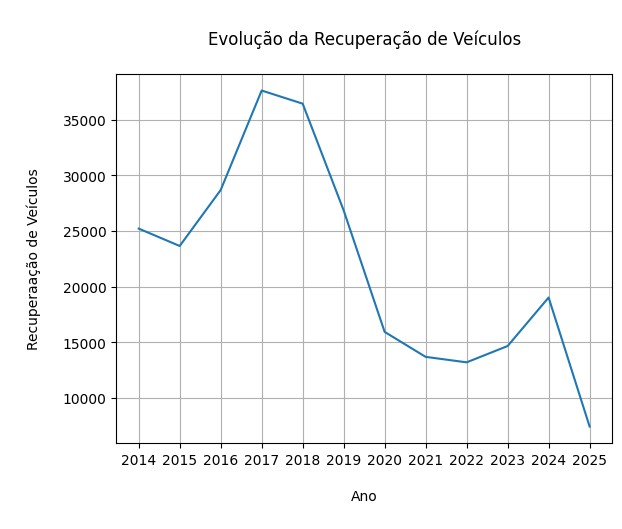

In [25]:
#gráfico
plt.plot(df_carros['ano'],df_carros['recuperacao_veiculos'])
plt.title('\nEvolução da Recuperação de Veículos\n')
plt.xlabel('\nAno\n')
plt.ylabel('\nRecuperaação de Veículos\n')
plt.grid(True)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

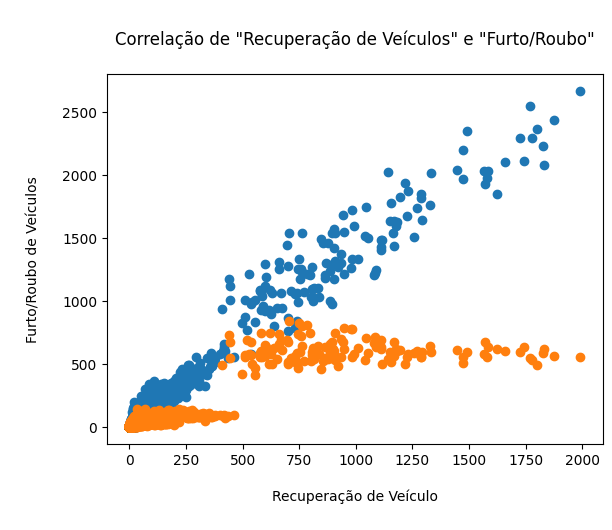

In [26]:
# gráfico de correlação de recuperação de veículos e ROUBO 
plt.scatter(df['recuperacao_veiculos'], df['roubo_veiculo'])
plt.title('\nCorrelação de "Recuperação de Veículos" e "Roubo"\n')
plt.xlabel('\nRecuperação de Veículo\n')
plt.ylabel('\nRoubo de Veículos\n')
plt.show

# gráfico de correlação de recuperação de veículos e FURTO 
plt.scatter(df['recuperacao_veiculos'], df['furto_veiculos'])
plt.title('\nCorrelação de "Recuperação de Veículos" e "Furto/Roubo"\n')
plt.xlabel('\nRecuperação de Veículo\n')
plt.ylabel('\nFurto/Roubo de Veículos\n')
plt.show

Média: 494.77
Mediana: 230.00
Distancia: 115.12%


<function matplotlib.pyplot.show(close=None, block=None)>

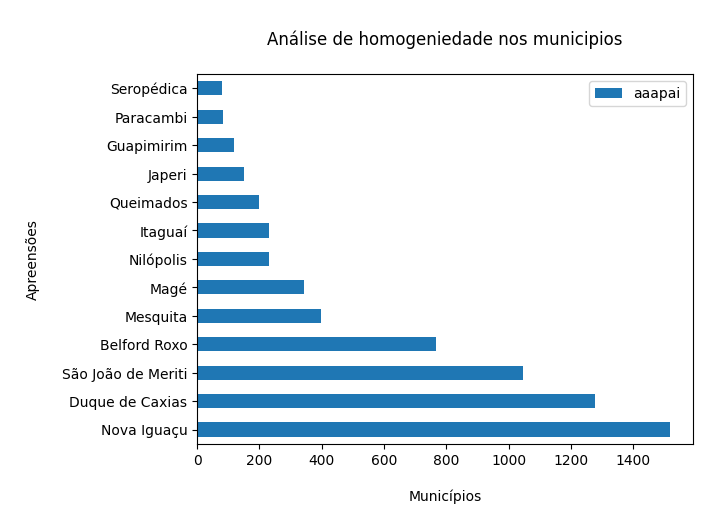

In [27]:
# lista de municipios que compoem a baixada
municipios_baix = ['Belford Roxo', 'Duque de Caxias', 'Guapimirim', 'Itaguaí', 'Japeri', 'Magé', 'Mesquita', 'Nilópolis', 'Nova Iguaçu', 'Paracambi', 'Queimados', 'São João de Meriti', 'Seropédica']

# filtra pelas colunas necessárias para a análise
df_baixada = df[(df['fmun'].isin(municipios_baix) & df['aaapai'])]

# agrupa e soma a quantidade de apreensões por município
df_baixada= df_baixada.groupby('fmun')['aaapai'].sum().reset_index()
df_baixada = df_baixada.sort_values(by='aaapai', ascending= False) #coloca em ordem decrescente

# Calculo das medidas de tendencias centrais
media_baixada= np.mean(df_baixada['aaapai'])
mediana_baixada= np.median(df_baixada['aaapai'])
distancia_baixada= (media_baixada - mediana_baixada)/mediana_baixada
distancia_baixada = distancia_baixada*100

print(f"Média: {media_baixada:.2f}\nMediana: {mediana_baixada:.2f}\nDistancia: {distancia_baixada:.2f}%")


#transformando em array
dados= np.array(df_baixada['aaapai'])
q3= np.percentile(dados,75) #definindo interquartil

maior25= df_baixada.loc[df_baixada['aaapai']>= q3] # definindo a condição
maior25 = maior25.sort_values('aaapai', ascending=False) # colocando em ordem decrescente

# gráfico referente ao ponto 2 
df_baixada.plot(kind= 'barh', x = 'fmun', y= 'aaapai')
plt.title('\nAnálise de homogeniedade nos municipios\n')
plt.xlabel('\nMunicípios\n')
plt.ylabel('\nApreensões\n')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

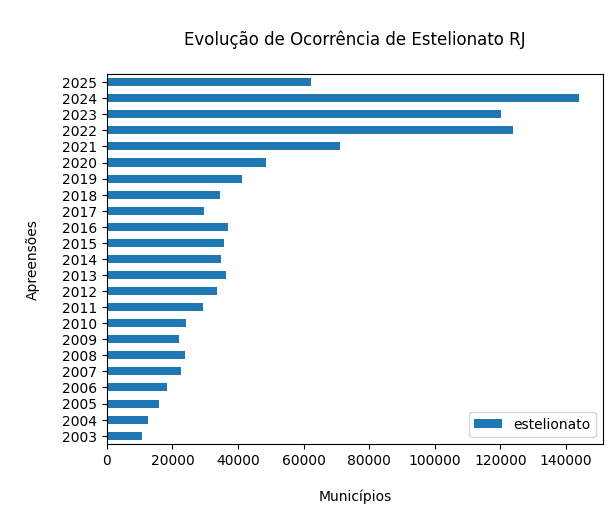

In [28]:
df2= pd.read_csv('https://www.ispdados.rj.gov.br/Arquivos/BaseDPEvolucaoMensalCisp.csv', sep= ';', encoding='latin1') # importação de outra base 

#evolução dos registros de estelionato na cidade
df_estel_ano= df2.groupby('ano')['estelionato'].sum().reset_index()
df_estel_ano['ano'] = df_estel_ano['ano'].astype(str) # troca o tipo da variável ano para int 

# gráfico referente ao ponto 2 
df_estel_ano.plot(kind= 'barh', x = 'ano', y= 'estelionato')
plt.title('\nEvolução de Ocorrência de Estelionato RJ\n')
plt.xlabel('\nMunicípios\n')
plt.ylabel('\nApreensões\n')
plt.show

Média: 44857.48
Mediana: 34493.00
Distancia: 30.05%


<function matplotlib.pyplot.show(close=None, block=None)>

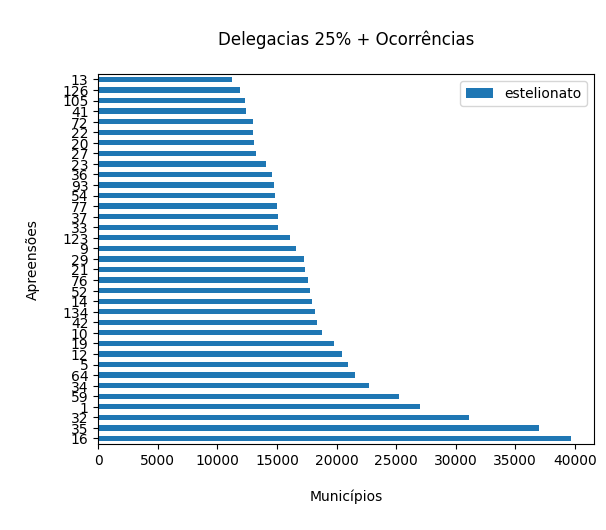

In [29]:
# Calculo das medidas de tendencias centrais
media_estel_ano= np.mean(df_estel_ano['estelionato'])
mediana_estel_ano= np.median(df_estel_ano['estelionato'])
distancia_estel_ano= (media_estel_ano - mediana_estel_ano)/mediana_estel_ano
distancia_estel_ano = distancia_estel_ano*100

print(f"Média: {media_estel_ano:.2f}\nMediana: {mediana_estel_ano:.2f}\nDistancia: {distancia_estel_ano:.2f}%")


# delegacias que compoem as 25% com mais ocorrências
df_estel= df2.groupby('cisp')['estelionato'].sum().reset_index()
dados_estel= np.array(df_estel['estelionato'])

#Intervalo Interquartil
q1= np.percentile(dados_estel,25)
q2= np.percentile(dados_estel,50)
q3= np.percentile(dados_estel,75)

iqr = q3 - q1
ls = q3 + (1.5 * iqr)
li = q1 - (1.5 * iqr)

maior_estel_25= df_estel.loc[df_estel['estelionato'] >= q3]
maior_estel_25= maior_estel_25.sort_values('estelionato', ascending=False)

# gráfico referente ao ponto 2 
maior_estel_25.plot(kind= 'barh', x = 'cisp', y= 'estelionato')
plt.title('\nDelegacias 25% + Ocorrências\n')
plt.xlabel('\nMunicípios\n')
plt.ylabel('\nApreensões\n')
plt.show

#16 - Barra da tijuca , 35 - Campo Grande , 32 - Taquara, 01 - Centro , 59 - Duque de Caxias


In [35]:
outliers_superior = df_estel.loc[df_estel['estelionato'] >= ls]
outliers_inferior = df_estel.loc[df_estel['estelionato'] <= li]

li

np.float64(-13418.25)

Média: 6299.00
Mediana: 5601.50
Distancia: 12.45%


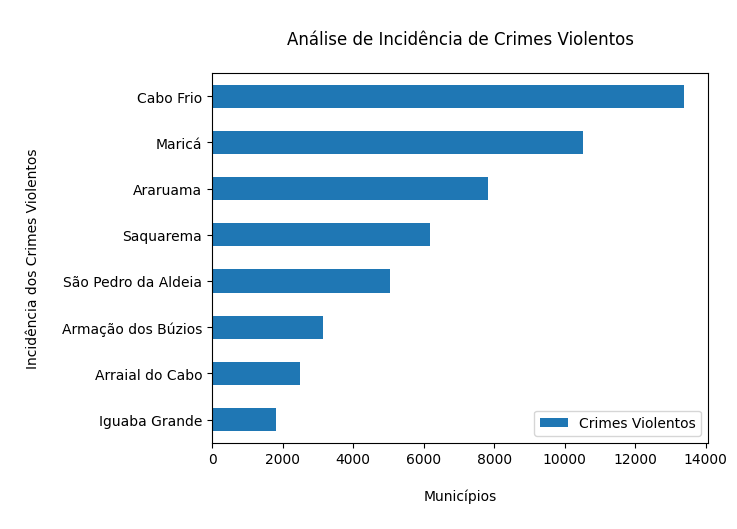

In [31]:
# exercicio 4 - Identificar municipios da regiao dos lagos com 25% com menos ocorrencias relacionadas a crimes violentos ____________________________________________________________________________

#criação de lista dos mucinicipios da regiao de lagos
regiao_lagos= ['Araruama', 'Armação dos Búzios', 'Arraial do Cabo', 'Cabo Frio', 'Iguaba Grande', 'São Pedro da Aldeia', 'Saquarema', 'Maricá']
#criação de lista das colunas classificadas como crimes violentos
crimes_violentos = ['hom_doloso', 'lesao_corp_morte' ,'latrocinio', 'hom_por_interv_policial', 'tentat_hom' ,'lesao_corp_dolosa', 'estupro']

# filtra pelas municipios da regiao dos lagos
df_lagos = df[(df['fmun'].isin(regiao_lagos))]

#agrupando apenas pelos crimes violentos
df_lagos= df_lagos.groupby('fmun')[crimes_violentos].sum().reset_index()

#Criando uma nova coluna e somando os valores de todas as colunas relacionadas com os crimes violentos
df_lagos['Crimes Violentos'] = df_lagos[crimes_violentos].sum(axis=1) # axis=0 -> soma verticalmente, = 1 -> horizontalmente

#juntando apenas as colunas necessárias para a analise
df_lagos = df_lagos[['fmun','Crimes Violentos']]

# Calculo das medidas de tendencias centrais
media_lagos= np.mean(df_lagos['Crimes Violentos'])
mediana_lagos= np.median(df_lagos['Crimes Violentos'])
distancia_lagos= (media_lagos - mediana_lagos)/mediana_lagos
distancia_lagos = distancia_lagos*100

print(f"Média: {media_lagos:.2f}\nMediana: {mediana_lagos:.2f}\nDistancia: {distancia_lagos:.2f}%")

df_lagos= df_lagos.sort_values(by='Crimes Violentos', ascending=True)
# transformando em vetor
dados_lagos= np.array(df_lagos['Crimes Violentos'])
q1= np.percentile(dados_lagos,25) # definindo interquartil

menor_25_lagos= df_lagos.loc[df_lagos['Crimes Violentos'] <= q1]
menor_25_lagos= menor_25_lagos.sort_values(by='Crimes Violentos', ascending=True)

# gráfico para análise
df_lagos.plot(kind='barh', x='fmun', y='Crimes Violentos')
plt.title('\nAnálise de Incidência de Crimes Violentos\n')
plt.xlabel('\nMunicípios\n')
plt.ylabel('\nIncidência dos Crimes Violentos\n')
plt.legend()
plt.show()



In [32]:
mais

NameError: name 'mais' is not defined

Média: 5943.08
Mediana: 4555.50
Distancia: 30.46%


<function matplotlib.pyplot.show(close=None, block=None)>

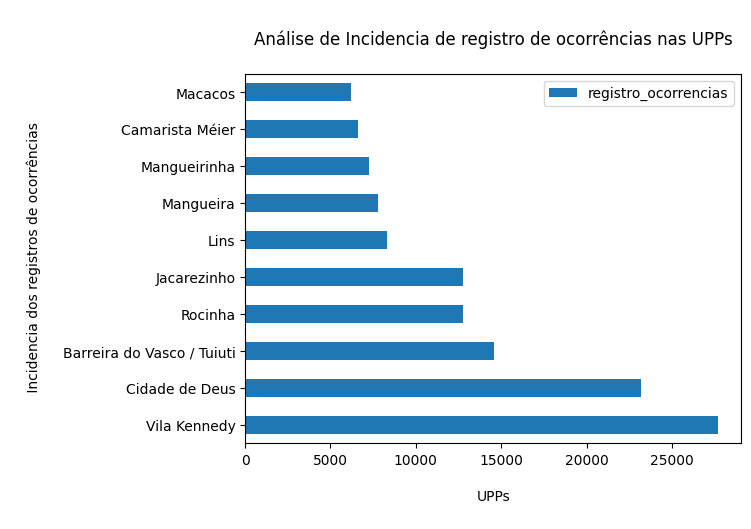

In [ ]:
df3= pd.read_csv('https://www.ispdados.rj.gov.br/Arquivos/UppEvolucaoMensalDeTitulos.csv', sep= ';', encoding='latin1') # importação da terceira base 

# agrupando por registro de ocorrencias 
df_upp= df3.groupby('upp')['registro_ocorrencias'].sum().reset_index()
df_upp = df_upp.sort_values(by= 'registro_ocorrencias', ascending= True) # colocando em ordem crescente

# Calculo das medidas de tendencias centrais
media_upp= np.mean(df_upp['registro_ocorrencias'])
mediana_upp= np.median(df_upp['registro_ocorrencias'])
distancia_upp= (media_upp - mediana_upp)/mediana_upp
distancia_upp = distancia_upp*100

print(f"Média: {media_upp:.2f}\nMediana: {mediana_upp:.2f}\nDistancia: {distancia_upp:.2f}%")

# transformando em vetor
dados_upp= np.array(df_upp['registro_ocorrencias'])
q3= np.percentile(dados_upp,75) # definindo interquartil

#filtrando pelo corte do quartil
maior_25_upp= df_upp.loc[df_upp['registro_ocorrencias'] >= q3]
maior_25_upp= maior_25_upp.sort_values(by='registro_ocorrencias', ascending=False)

# gráfico para análise
maior_25_upp.plot(kind= 'barh', x = 'upp', y= 'registro_ocorrencias')
plt.title('\nAnálise de Incidencia de registro de ocorrências nas UPPs\n')
plt.xlabel('\nUPPs\n')
plt.ylabel('\n Incidencia dos registros de ocorrências\n')
plt.show
